In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
data_filename = '10min_16mm.csv'
using_colab = False

data_start = 2
data = np.loadtxt('10min_16mm.csv', unpack=True, skiprows = data_start, delimiter = ",")
print(data)

channel = data[0]
N = data[1]
dN = np.sqrt(N)

for value in dN:
  print(value)

dN = np.sqrt(N)
for i, value in enumerate(dN):
    if value == 0:
        dN[i] = 1.14
print(dN0)

Double Gaussian Fit

Converged with chi-squared 113302.93
Number of degrees of freedom, dof = 317.00
Reduced chi-squared 357.42

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 4.000e+02                | -5.968e+04               | 2.426e+10               
1           | 1.000e+03                | 6.751e+03                | 4.109e+09               
2           | 5.000e+01                | 5.898e+04                | 2.337e+10               
3           | 2.000e+02                | 9.689e+03                | 4.057e+09               
4           | 6.000e+04                | 6.038e+04                | 2.949e+10               
5           | 1.000e+02                | 2.817e+04                | 1.302e+10               
6           | 5.000e+01                | -1.308e+00               | 1.343e-02               
7           | 5.000e+00                | 1.520e+03                | 2.705e+05               


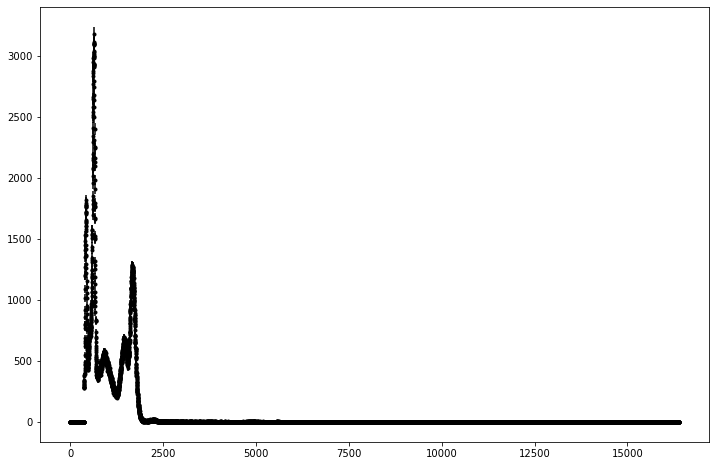

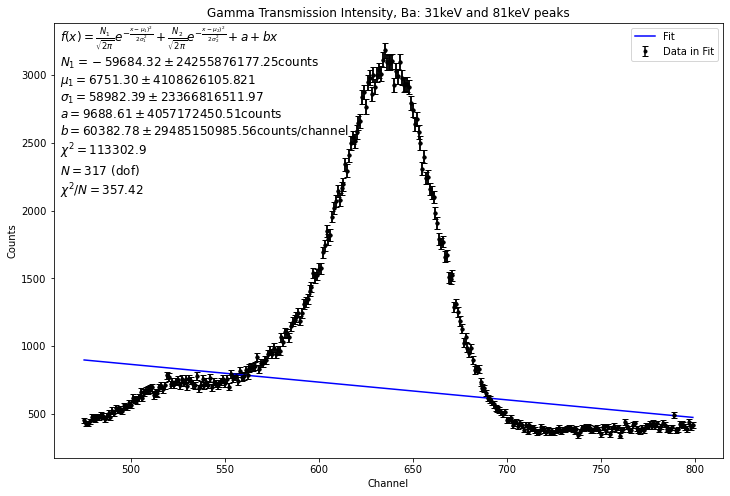

In [5]:
fig,ax = plt.subplots(figsize = (12,8))
ax.errorbar(channel, N, dN, fmt='k.')

min_value = 475
max_value = 800
fig,ax = plt.subplots(figsize = (12,8))

channel2=channel[min_value:max_value]
N2=N[min_value:max_value]
dN2 = dN[min_value:max_value]

def data_fit(p0,func,xvar, yvar, err,tmi=0):
    try:
        fit = optimize.least_squares(residual, p0, args=(func,xvar, yvar, err),verbose=tmi)
    except Exception as error:
        print("Something has gone wrong:",error)
        return p0,np.zeros_like(p0),-1,-1
    pf = fit['x']

    print()

    try:
        cov = np.linalg.inv(fit['jac'].T.dot(fit['jac']))          
        # This computes a covariance matrix by finding the inverse of the Jacobian times its transpose
        # We need this to find the uncertainty in our fit parameters
    except:
        # If the fit failed, print the reason
        print('Fit did not converge')
        print('Result is likely a local minimum')
        print('Try changing initial values')
        print('Status code:', fit['status'])
        print(fit['message'])
        return pf,np.zeros_like(pf),-1,-1
            #You'll be able to plot with this, but it will not be a good fit.

    chisq = sum(residual(pf,func,xvar, yvar, err) **2)
    dof = len(xvar) - len(pf)
    red_chisq = chisq/dof
    pferr = np.sqrt(np.diagonal(cov)) # finds the uncertainty in fit parameters by squaring diagonal elements of the covariance matrix
    print('Converged with chi-squared {:.2f}'.format(chisq))
    print('Number of degrees of freedom, dof = {:.2f}'.format(dof))
    print('Reduced chi-squared {:.2f}'.format(red_chisq))
    print()
    Columns = ["Parameter #","Initial guess values:", "Best fit values:", "Uncertainties in the best fit values:"]
    print('{:<11}'.format(Columns[0]),'|','{:<24}'.format(Columns[1]),"|",'{:<24}'.format(Columns[2]),"|",'{:<24}'.format(Columns[3]))
    for num in range(len(pf)):
        print('{:<11}'.format(num),'|','{:<24.3e}'.format(p0[num]),'|','{:<24.3e}'.format(pf[num]),'|','{:<24.3e}'.format(pferr[num]))
    return pf, pferr, chisq,dof

def doublegaussianfunc(p,x):
    return p[0]/(np.sqrt(2*np.pi*p[2]**2))*np.exp(-(x-p[1])*2/(2*p[2]**2)) + p[3]/(np.sqrt(2*np.pi*p[5]**2))*np.exp(-(x-p[4])*2/(2*p[5]**2))+ p[6]*x + p[7]
     
def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err

print("Double Gaussian Fit")
p0=[400.,1000.,50.,200,60000.,100,50,5-0]

pf1,pferr1,chisq1,dof1=data_fit(p0,doublegaussianfunc,channel2,N2,dN2)

ax.errorbar(channel2,N2,yerr=dN2,fmt='k.',label='Data in Fit',capsize=3)

channel_cont=np.linspace(min(channel2),max(channel2),5000)
ax.plot(channel_cont,doublegaussianfunc(pf1,channel_cont),'b-',label='Fit')

textfit=r'$f(x) = \frac{N_1}{\sqrt{2\pi}} e^{-\frac{x-\mu_1)^2}{2\sigma_1^2}}+\frac{N_2}{\sqrt{2\pi}} e^{-\frac{x-\mu_2)^2}{2\sigma_2^2}}+a+bx$'+'\n'
textfit+='$N_1={:.2f}\pm{:.2f}$counts\n'.format(pf1[0],pferr1[0])
textfit+='$\mu_1={:.2f}\pm{:.2f}$1\n'.format(pf1[1],pferr1[1])
textfit+='$\sigma_1={:.2f}\pm{:.2f}$\n'.format(pf1[2],pferr1[2])
textfit+='$a={:.2f}\pm{:.2f}$counts\n'.format(pf1[3],pferr1[3])
textfit+='$b={:.2f}\pm{:.2f}$counts/channel\n'.format(pf1[4],pferr1[4])
textfit += '$\chi^2= {:.1f}$ \n'.format(chisq1) 
textfit += '$N = {}$ (dof) \n'.format(dof1) 
textfit += '$\chi^2/N = {:.2f}$'.format(chisq1/dof1)

ax.errorbar(channel[min_value:max_value], N[min_value:max_value], dN[min_value:max_value], fmt='k.')
ax.text(0.01,0.995,textfit,transform=ax.transAxes,fontsize=12,verticalalignment='top')
ax.set_title("Gamma Transmission Intensity, Ba: 31keV and 81keV peaks")
ax.set_xlabel("Channel")
ax.set_ylabel("Counts")
ax.legend()

Gaussian Fit

Converged with chi-squared 753.59
Number of degrees of freedom, dof = 317.00
Reduced chi-squared 2.38

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 2.600e+05                | -1.242e+08               | 2.679e+08               
1           | 6.300e+02                | 1.176e+03                | 2.823e+02               
2           | 6.000e+01                | 5.157e+02                | 2.850e+02               
3           | 6.000e+02                | -1.343e+04               | 1.529e+04               
4           | 1.000e+01                | 1.095e+02                | 1.189e+02               
5           | 2.020e+05                | 1.504e+05                | 1.217e+03               
6           | 4.000e+02                | 6.359e+02                | 9.712e-02               
7           | 7.000e+01                | 2.455e+01                | 1.342e-01               


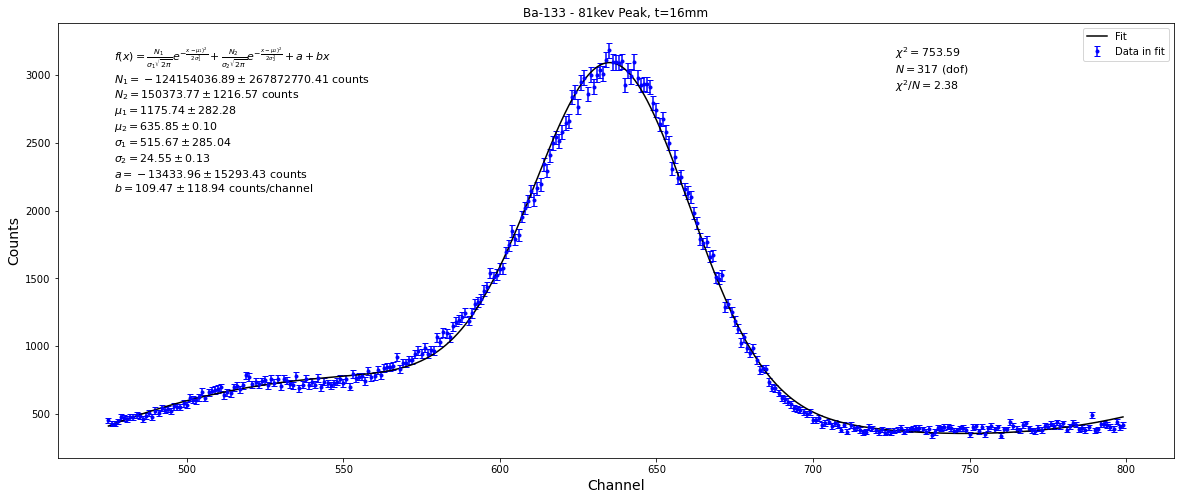

In [10]:
def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err
def double_gaussianfunc(p,x):
    return p[0]/(p[2]*np.sqrt(2*np.pi))*np.exp(-(x-p[1])**2/(2*p[2]**2))+p[5]/(p[7]*np.sqrt(2*np.pi))*np.exp(-(x-p[6])**2/(2*p[7]**2))+p[3]+p[4]*x

fig,ax = plt.subplots(figsize = (20,8))
min_value1 = 475
max_value1 = 800
channel3 = channel[min_value1:max_value1]
N3 = N[min_value1:max_value1]
dN3 = dN[min_value1:max_value1]
print("Gaussian Fit")
p0 = [260000., 630., 60., 600, 10, 202000., 400., 70.,]
pf2, pferr2, chisq2, dof2 = data_fit(p0,double_gaussianfunc, channel3, N3, dN3)

ax.errorbar(channel3, N3, dN3,capsize=3, fmt='b.',label='Data in fit')
ax.set_title("Ba-133 - 81kev Peak, t=16mm")
ax.set_xlabel('Channel', fontsize=14, fontweight='normal')
ax.set_ylabel('Counts', fontsize=14, fontweight='normal')
channel_cont2 = np.linspace(min(channel3), max(channel3), 5000)
textfit1 = r'$f(x) =\frac{N_1}{\sigma_1\sqrt{2\pi}} e^{-\frac{x-\mu_1)^2}{2\sigma_1^2}}+\frac{N_2}{\sigma_2\sqrt{2\pi}} e^{-\frac{x-\mu_2)^2}{2\sigma_2^2}}+a+bx$'+'\n'
textfit1 += '$N_1 = {:.2f} \pm {:.2f}$ counts \n'.format(pf2[0],pferr2[0])
textfit1 += '$N_2 = {:.2f} \pm {:.2f}$ counts \n'.format(pf2[5],pferr2[5])
textfit1 +='$\\mu_1 = {:.2f} \pm {:.2f}$ \n'.format(pf2[1],pferr2[1])
textfit1 +='$\\mu_2 = {:.2f} \pm {:.2f}$ \n'.format(pf2[6],pferr2[6])
textfit1 +='$\\sigma_1 = {:.2f} \pm {:.2f}$ \n'.format(pf2[2],pferr2[2])
textfit1 +='$\\sigma_2 = {:.2f} \pm {:.2f}$ \n'.format(pf2[7],pferr2[7])
textfit1 += '$a = {:.2f} \pm {:.2f}$ counts \n'.format(pf2[3],pferr2[3])
textfit1 += '$b = {:.2f} \pm {:.2f}$ counts/channel \n'.format(pf2[4],pferr2[4])
textfit2 = '$\chi^2= {:.2f}$ \n'.format(chisq2)
textfit2 += '$N = {}$ (dof) \n'.format(dof2)
textfit2 += '$\chi^2/N = {:.2f}$'.format(chisq2/dof2)
ax.text(0.05, 0.95, textfit1, transform=ax.transAxes , fontsize=11,verticalalignment='top')
ax.text(0.75, 0.95, textfit2, transform=ax.transAxes , fontsize=11,verticalalignment='top')
ax.plot(channel_cont2, double_gaussianfunc(pf2, channel_cont2), 'k-', label='Fit')
ax.legend()
plt.savefig('Ba133_81keV_(16mm).pdf')

Gaussian Fit

Converged with chi-squared 176.64
Number of degrees of freedom, dof = 95.00
Reduced chi-squared 1.86

Parameter # | Initial guess values:    | Best fit values:         | Uncertainties in the best fit values:
0           | 5.600e+04                | 5.734e+04                | 5.650e+02               
1           | 4.200e+02                | 4.232e+02                | 1.165e-01               
2           | 1.000e+01                | 1.626e+01                | 1.366e-01               
3           | 4.000e+02                | -6.040e+02               | 3.852e+01               
4           | 1.000e+01                | 2.280e+00                | 9.081e-02               


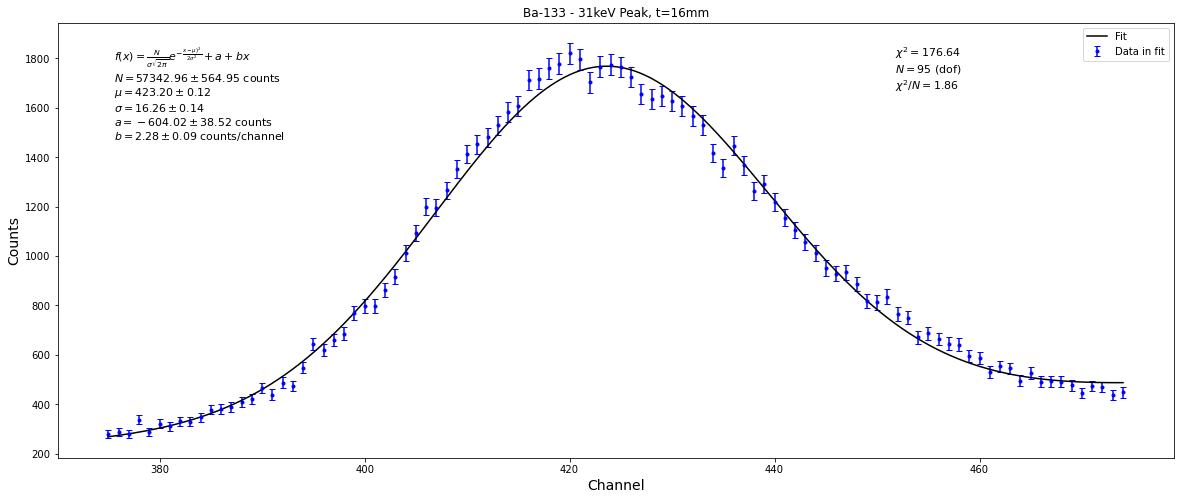

In [15]:
def residual(p,func, xvar, yvar, err):
    return (func(p, xvar) - yvar)/err
def gaussianfunc(p,x):
    return p[0]/(p[2]*np.sqrt(2*np.pi))*np.exp(-(x-p[1])**2/(2*p[2]**2))+p[3]+p[4]*x

fig,ax = plt.subplots(figsize = (20,8))
min_value1 = 375
max_value1 = 475
channel3 = channel[min_value1:max_value1]
N3 = N[min_value1:max_value1]
dN3 = dN[min_value1:max_value1]
print("Gaussian Fit")
p0 = [56000., 420., 10., 400, 10,]
pf2, pferr2, chisq2, dof2 = data_fit(p0,gaussianfunc, channel3, N3, dN3)

ax.errorbar(channel3, N3, dN3,capsize=3, fmt='b.',label='Data in fit')
ax.set_title("Ba-133 - 31keV Peak, t=16mm")
ax.set_xlabel('Channel', fontsize=14, fontweight='normal')
ax.set_ylabel('Counts', fontsize=14, fontweight='normal')
channel_cont2 = np.linspace(min(channel3), max(channel3), 5000)
textfit1 = r'$f(x) =\frac{N}{\sigma\sqrt{2\pi}} e^{-\frac{x-\mu)^2}{2\sigma^2}}+a+bx$'+'\n'
textfit1 += '$N = {:.2f} \pm {:.2f}$ counts \n'.format(pf2[0],pferr2[0])
textfit1 +='$\\mu = {:.2f} \pm {:.2f}$ \n'.format(pf2[1],pferr2[1])
textfit1 +='$\\sigma = {:.2f} \pm {:.2f}$ \n'.format(pf2[2],pferr2[2])
textfit1 += '$a = {:.2f} \pm {:.2f}$ counts \n'.format(pf2[3],pferr2[3])
textfit1 += '$b = {:.2f} \pm {:.2f}$ counts/channel \n'.format(pf2[4],pferr2[4])
textfit2 = '$\chi^2= {:.2f}$ \n'.format(chisq2)
textfit2 += '$N = {}$ (dof) \n'.format(dof2)
textfit2 += '$\chi^2/N = {:.2f}$'.format(chisq2/dof2)
ax.text(0.05, 0.95, textfit1, transform=ax.transAxes , fontsize=11,verticalalignment='top')
ax.text(0.75, 0.95, textfit2, transform=ax.transAxes , fontsize=11,verticalalignment='top')
ax.plot(channel_cont2, gaussianfunc(pf2, channel_cont2), 'k-', label='Fit')
ax.legend()
plt.savefig('Ba133_31keV_(16mm).pdf')